#Assignment

Choose the appropriate data sets individually and carry out the basic analysis of the multivariate data including graphical, descriptive and estimation of mean, variance-covariance, and correlation matrix. Also, carry out the PCA and LDA Ensure proper interpretation of the results.

Obtain appropriate like Iris data, utility data, bike sharing data etc., multivariate data can for the above assignment.

Complete report to be submitted by 27.02.2024 to Prof. M. R. Srinivasan's email id: mrsrin8@gmail.com

## Setting up the python environment

### Importing the libraries

In [1]:
from pydoc import help
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
import itertools

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

## Reading Multivariate Analysis Data into Python

The first thing to do to analyse the multivariate data will be to read it into Python, and to plot the data.

I will use the iris dataset for the purpose of this assignment. The file
http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
contains measurements for iris flowers from three species: Iris-setosa, Iris-versicolor, and Iris-virginica. The dataset looks like this:

```
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...
```

There is one row per iris sample. The first four columns represent the sepal length, sepal width, petal length, and petal width respectively, while the fifth column indicates the species name. The columns are separated by commas, i.e. it is a comma-separated (csv) file without a header row.


In [2]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]
data = data[["V5", "V1", "V2", "V3", "V4"]]
data.columns = ["V1", "V2", "V3", "V4", "V5"]
class_map = {
    "Iris-setosa": 1,
    "Iris-versicolor": 2,
    "Iris-virginica": 3
}
data["V1"] = data["V1"].map(class_map)
data.V1 = data.V1.astype(str)
X = data.loc[:, "V2":]  # independent variables data
y = data.V1  # dependednt variable data
data

,V1,V2,V3,V4,V5
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,3,6.7,3.0,5.2,2.3
146,3,6.3,2.5,5.0,1.9
147,3,6.5,3.0,5.2,2.0
148,3,6.2,3.4,5.4,2.3


Above, the data on 150 samples of iris has been read into the variable `data`.

## Plotting Multivariate Data

Once we have read a multivariate data set into python, we make a plot of the data.

### A Matrix Scatterplot

One common way of plotting multivariate data is to make a *matrix scatterplot*, showing each pair of variables plotted against each other.

In [5]:
data.loc[:, "V2":"V5"]

,V2,V3,V4,V5
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Here, the variables are:

-   **V2:** Sepal Length
-   **V3:** Sepal Width
-   **V4:** Petal Length
-   **V5:** Petal Width

The class labels (V1) are:

-   **1:** *Iris-setosa*
-   **2:** *Iris-versicolor*
-   **3:** *Iris-virginica*

We make a matrix scatterplot of all the 4 variables.

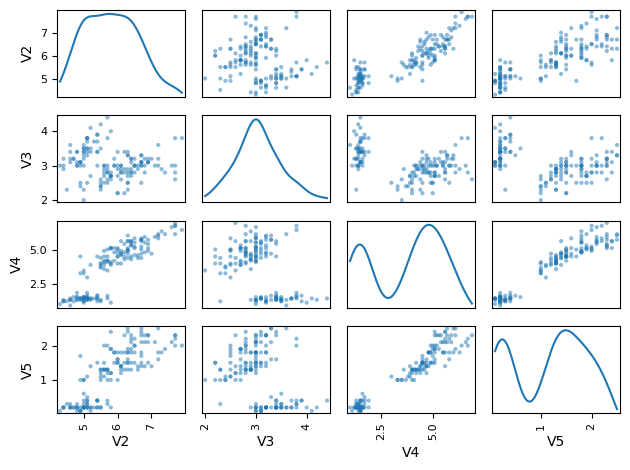

In [6]:
scatter_matrix(data.loc[:, "V1":"V5"], diagonal="kde")
plt.tight_layout()
plt.show()

In the above matrix scatterplot, the diagonal cells show histograms of each of the variables, in this case the measurements of the iris flower attributes (V2, V3, V4, and V5).

Each of the off-diagonal cells is a scatterplot of two of the four measurements, for example, the second cell in the first row is a scatterplot of V2 (y-axis) against V3 (x-axis).

**Overall Interpretations:**

-   The strongest correlations appear between **V2 (sepal length) and V4 (petal length)** as well as **V4 (petal length) and V5 (petal width)**.
-   Variables **V3 (sepal width)** show weaker relationships with other variables, indicating it may not be as useful for distinguishing iris species.
-   The scatterplots reveal distinct clusters, suggesting that different iris species may be separable based on combinations of these measurements.


### A Scatterplot with the Data Points Labelled by their Group

Now, we  examine the relationships between the columns more closely, by plotting scatterplots of all two variable combinations, with the data points labeled by their group.

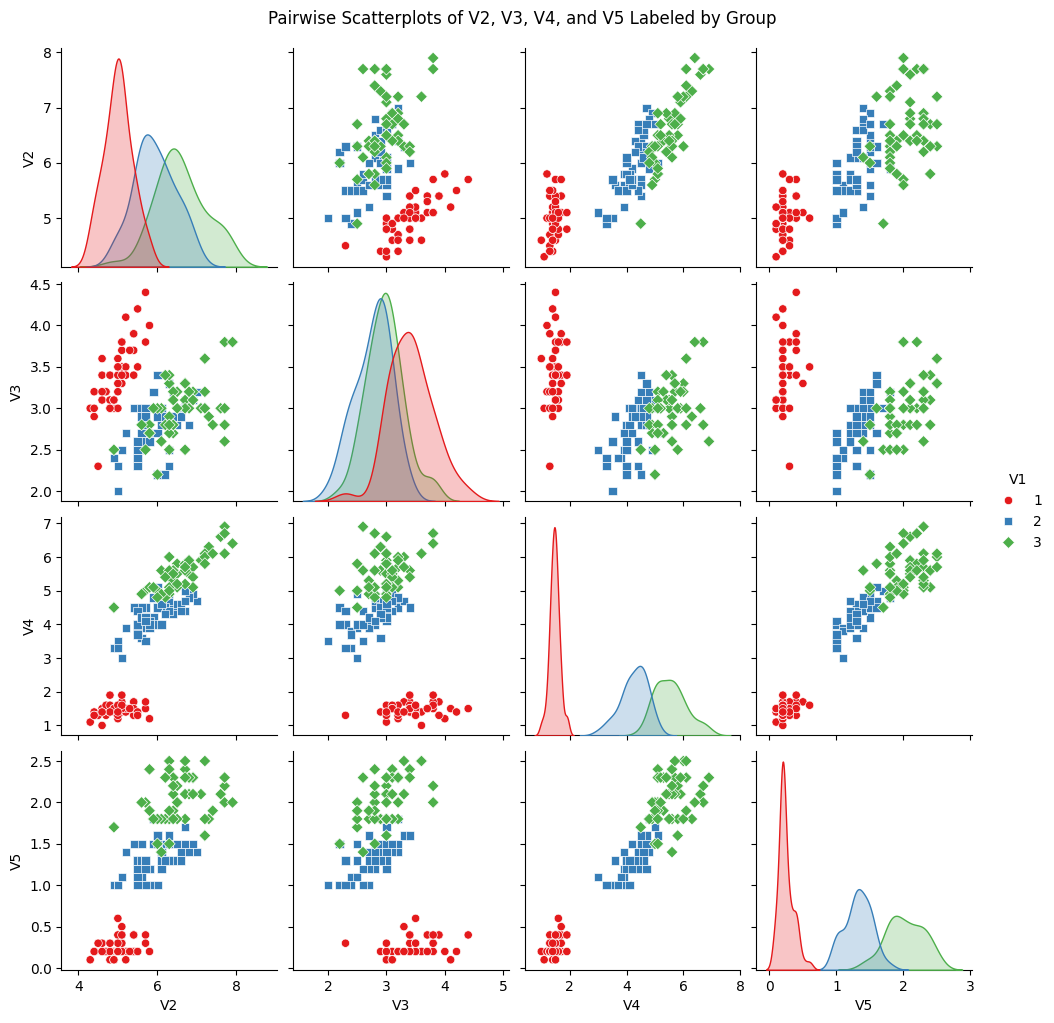

In [7]:
# Plot all pairwise scatterplots in a single plot
sns.pairplot(data=data, vars=["V2", "V3", "V4", "V5"], hue="V1", palette="Set1", markers=["o", "s", "D"])

# Display the plot
plt.suptitle("Pairwise Scatterplots of V2, V3, V4, and V5 Labeled by Group", y=1.02)
plt.show()

### **Pairwise Scatterplots**

* * * * *

**Diagonal (KDE) Observations**

    -   Each diagonal plot shows the distribution of a single feature (V2, V3, V4, or V5).
    -   Notice that Iris-setosa (red circles) has generally smaller petal length (V4) and petal width (V5) distributions compared to *Iris-versicolor* (green diamonds) and Iris-virginica (blue squares).
    -   For sepal length (V2) and sepal width (V3), the three classes overlap more, but Iris-setosa still tends to occupy a somewhat different range than the other two.
**Off-Diagonal (Scatterplots) Observations**

    - V4 vs. V5 (Petal Length vs. Petal Width):
        -   Strong positive correlation for all classes.
        -   Iris-setosa (1) clusters in the lower-left region (shorter, narrower petals).
        -   Iris-virginica (3) occupies the upper-right (longer, wider petals).
        -   Iris-versicolor (2) lies mostly in the middle.
    - V2 vs. V3 (Sepal Length vs. Sepal Width):
        -   More overlap among the classes, though Iris-setosa* is still partially separated.
        -   Iris-versicolor and Iris-virginica show considerable overlap here.
    - V2 or V3 vs. V4 or V5:
        -   Petal measurements (V4, V5) provide clearer class separation than sepal measurements (V2, V3).
Class Separation**

    -   Iris-setosa (1) is distinctly separated from the others in petal dimensions (V4, V5).
    -   Iris-versicolor (2) and Iris-virginica (3) overlap in sepal dimensions, but diverge more clearly in the petal dimensions.

### A Profile Plot

We make a *profile plot*, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

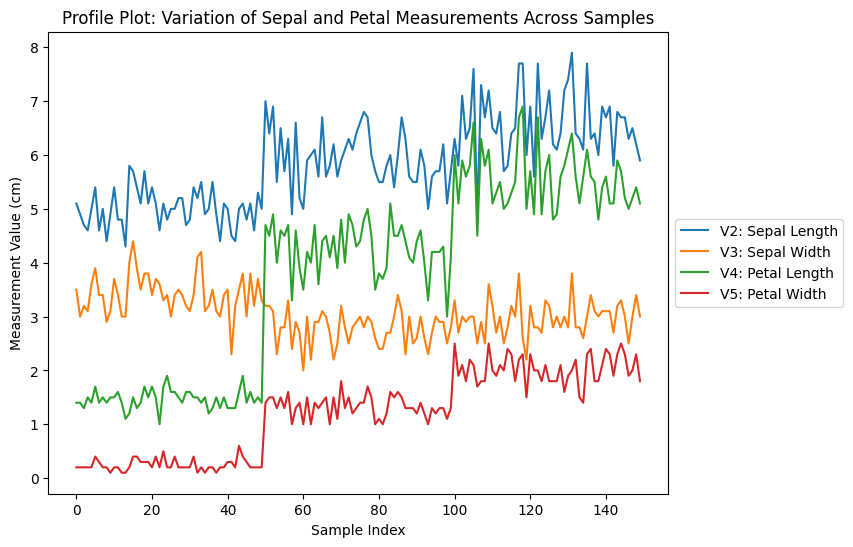

In [8]:
# Profile plot of V2, V3, V4, V5
ax = data[["V2", "V3", "V4", "V5"]].plot(figsize=(8, 6), linewidth=1.5)
ax.set_title("Profile Plot: Variation of Sepal and Petal Measurements Across Samples")
ax.set_xlabel("Sample Index")
ax.set_ylabel("Measurement Value (cm)")
ax.legend(["V2: Sepal Length", "V3: Sepal Width", "V4: Petal Length", "V5: Petal Width"],
          loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### **Interpretation of the Profile Plot**
****

The profile plot visualizes the variation in each of the four features---sepal length, sepal width, petal length, and petal width---across all 150 samples in the Iris dataset. The key insights are as follows:

Overall Trends

    -   V2 (Sepal Length, Blue): Highest overall values, fluctuating between 4 and 8 cm. It shows some variation within each species but not as dramatic as petal measurements.
    -   V3 (Sepal Width, Orange): Moderate values between 2 and 4.5 cm, with less distinct jumps between species compared to petal features.
    -   V4 (Petal Length, Green): Displays a clear step-like increase, reflecting the transition from Iris-setosa to Iris-versicolor and Iris-virginica.
    -   V5 (Petal Width, Red): The lowest overall values, but also showing a clear increase as species change from Iris-setosa to Iris-virginica.
Species-Based Patterns

    -   The dataset is typically ordered by species:
        -   Samples 0--49: Iris-setosa (Class 1) --- Small petal measurements and relatively consistent sepal measurements.
        -   Samples 50--99: Iris-versicolor (Class 2) --- Moderate petal length and width, with noticeable increases compared to Iris-setosa.
        -   Samples 100--149: Iris-virginica (Class 3) --- The largest petal measurements, with values significantly higher than the other two species.
Key Observations

    -   Petal Length (V4) and Petal Width (V5) exhibit distinct and easily distinguishable patterns across the species.
    -   Sepal Length (V2) and Sepal Width (V3) are more variable and overlap more between species, indicating they may be less effective for classification.
    -   The sharp increase around sample index 50 and again at index 100 aligns with the transition from Iris-setosa to Iris-versicolor and Iris-virginica, respectively.

## Calculating Summary Statistics for Multivariate Data

We calculate summary statistics such as the mean and standard deviation for each of the variables in our multivariate data set.

For example, say we want to calculate the mean and standard deviations of each of the 13 chemical concentrations in the wine samples. These are stored in columns V2-V5 of the variable `data`, which has been previously assigned to `X` for convenience.

In [9]:
# Calculate mean and standard deviation for V2-V5
mean_values = X.apply(np.mean)
std_values = X.apply(np.std)

# Display the results
print("Mean values:\n", mean_values)
print("\nStandard deviations:\n", std_values)

Mean values:
 V2    5.843333
V3    3.054000
V4    3.758667
V5    1.198667
dtype: float64

Standard deviations:
 V2    0.825301
V3    0.432147
V4    1.758529
V5    0.760613
dtype: float64


**Observations:**
****

    -   V2 (Sepal Length) has the largest mean (5.84 cm), indicating that, on average, the sepal length is the largest dimension measured.
    -   V3 (Sepal Width) has the lowest standard deviation (0.43), meaning it varies the least across samples.
    -   V4 (Petal Length) has the largest standard deviation (1.76), indicating significant variation, especially between species.
    -   V5 (Petal Width) shows moderate variability, with a standard deviation of 0.76.

We can see here that it would make sense to standardise in order to compare the variables because the variables have very different standard deviations so that it has a sample variance of 1 and sample mean of 0.

### Means and Variances Per Group

It is often interesting to calculate the means and standard deviations of the iris measurements for each species, which we do now:

In [10]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [11]:
printMeanAndSdByGroup(X, y)

## Means:


,0
V1,
1,2.533
2,3.573
3,4.285



## Standard deviations:


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,V2,V3,V4,V5
V1,,,,
1,0.348947,0.377195,0.171767,0.106132
2,0.510983,0.310644,0.465188,0.195765
3,0.629489,0.319255,0.546348,0.271890



## Sample sizes:


,0
V1,
1,50
2,50
3,50


The arguments of the function are the variables that you want to calculate means and standard deviations for (`X`), and the variable containing the group of each sample (`y`).

Overall, we find that:

    -   Iris-setosa is distinct, with much smaller petals.
    -   Iris-versicolor and Iris-virginica differ mainly in petal size, with the latter having larger petals.
    -   The differences in mean values, particularly for petal measurements (V4 and V5), are key for species differentiation, while the standard deviations give insight into the consistency of these features within each species.

### Between-groups Variance and Within-groups Variance for a Variable

We calculate the within-groups variance for a particular variable below:

In [12]:
def calcWithinGroupsVariance(variable, groupvariable):
    """
    Calculates the pooled (within-groups) variance for a given variable.
    """
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    numtotal = 0
    denomtotal = 0
    for level in levels:
        levelidata = variable[groupvariable == level]
        n_i = len(levelidata)
        sdi = np.std(levelidata)
        numtotal += n_i * sdi**2
        denomtotal += n_i
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

def calcBetweenGroupsVariance(variable, groupvariable):
    """
    Calculates the between-groups variance for a given variable.
    """
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    grandmean = np.mean(variable)
    numtotal = 0
    for level in levels:
        levelidata = variable[groupvariable == level]
        n_i = len(levelidata)
        mean_i = np.mean(levelidata)
        numtotal += n_i * (mean_i - grandmean)**2
    Vb = numtotal / (numlevels - 1)
    return Vb

def calcSeparations(variables, groupvariable):
    """
    Calculates the within-groups variance (Vw), between-groups variance (Vb), and
    separation (Vb/Vw)
    """
    results = []
    for variablename in variables.columns:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb / Vw
        results.append({
            "Variable": variablename,
            "Vw": round(Vw, 4),
            "Vb": round(Vb, 4),
            "Separation": round(sep, 4)
        })
    results_df = pd.DataFrame(results, columns=["Variable", "Vw", "Vb", "Separation"])
    display(results_df)

calcSeparations(X, y)

,Variable,Vw,Vb,Separation
0,V2,0.2650,31.6061,119.2645
1,V3,0.1159,5.4888,47.3645
2,V4,0.1852,218.3219,1179.0343
3,V5,0.0420,40.3021,959.3244


**Observations**

    - The results indicate that the petal measurements provide far better separation between the Iris species than the sepal measurements.
    - Specifically, petal length (V4) shows the highest separation, followed closely by petal width (V5).
    - This means that the differences in these petal dimensions between species are extremely pronounced relative to the variability within each species.
    - In contrast, sepal length (V2) and especially sepal width (V3) offer much lower separation, suggesting they are less effective for distinguishing among the species.

### Between-groups Covariance and Within-groups Covariance for Two Variables

It is often of interest to calculate the within-groups covariance and between-groups variance for pairs of the variables which is done below:

In [13]:
import numpy as np
import pandas as pd

def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    """
    Calculate the pooled within-groups covariance for two variables in the Iris dataset.

    Parameters:
        variable1 (Series): A numeric Series (e.g., one of V2-V5).
        variable2 (Series): A numeric Series (e.g., one of V2-V5).
        groupvariable (Series): The species labels (V1) for the Iris dataset.
                                ("1" = Iris-setosa, "2" = Iris-versicolor, "3" = Iris-virginica)

    Returns:
        float: The pooled within-groups covariance.
    """
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # Compute the covariance within each group and sum them
    for level in levels:
        data1 = variable1[groupvariable == level]
        data2 = variable2[groupvariable == level]
        mean1 = np.mean(data1)
        mean2 = np.mean(data2)
        n_i = len(data1)
        group_cov = sum((x - mean1) * (y - mean2) for x, y in zip(data1, data2))
        Covw += group_cov
    total_length = len(variable1)
    Covw /= (total_length - numlevels)
    return Covw

def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    """
    Calculate the between-groups covariance for two variables in the Iris dataset.

    Parameters:
        variable1 (Series): A numeric Series (e.g., one of V2-V5).
        variable2 (Series): A numeric Series (e.g., one of V2-V5).
        groupvariable (Series): The species labels (V1) for the Iris dataset.

    Returns:
        float: The between-groups covariance.
    """
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    grand_mean1 = np.mean(variable1)
    grand_mean2 = np.mean(variable2)
    Covb = 0.0
    # Compute the contribution of each group based on its deviation from the grand mean
    for level in levels:
        data1 = variable1[groupvariable == level]
        data2 = variable2[groupvariable == level]
        mean1 = np.mean(data1)
        mean2 = np.mean(data2)
        n_i = len(data1)
        Covb += n_i * (mean1 - grand_mean1) * (mean2 - grand_mean2)
    Covb /= (numlevels - 1)
    return Covb

# Create an empty list to store the results
results = []

# Iterate over all unique pairs of variables in X (columns V2-V5)
for var1, var2 in itertools.combinations(X.columns, 2):
    cov_within = calcWithinGroupsCovariance(X[var1], X[var2], y)
    cov_between = calcBetweenGroupsCovariance(X[var1], X[var2], y)
    results.append({
        "Group 1": var1,
        "Group 2": var2,
        "Within-Covariance": round(cov_within, 4),
        "Between-Covariance": round(cov_between, 4)
    })

# Convert the results to a DataFrame and display it
covariances_df = pd.DataFrame(results, columns=["Group 1", "Group 2", "Within-Covariance", "Between-Covariance"])
display(covariances_df)

,Group 1,Group 2,Within-Covariance,Between-Covariance
0,V2,V3,0.0931,-9.7670
1,V2,V4,0.1674,82.5823
2,V2,V5,0.0385,35.6815
3,V3,V4,0.0552,-28.0276
4,V3,V5,0.0334,-11.2462
5,V4,V5,0.0425,93.4541


### Observations:

    - Within-Groups Covariance: This value reflects how two variables co-vary within the same Iris species. Positive values indicate that, within a species, as one measurement increases the other tends to increase as well.

    - Between-Groups Covariance: This value shows how the group means of the two variables differ from the overall grand mean. A positive value means that species with higher averages for one variable tend to have higher averages for the other; a negative value indicates an inverse relationship between the group means.

    - The results reveal contrasting relationships within and between species.  Within each species, the covariances are generally small and positive, indicating that the variables are weakly related on an individual level.
    
    - However, when comparing species, sepal measurements (V2 with V3) tend to move in opposite directions, while petal measurements—especially petal length (V4) with petal width (V5)—show a strong positive association. This means that, across species, those with longer petals also have wider petals, whereas sepal dimensions vary inversely between groups.


### Calculating Correlations for Multivariate Data¶

It is often of interest to investigate whether any of the variables in a multivariate data set are significantly correlated.

In [14]:
# Calculate the correlation matrix for V2-V5
corrmat = X.corr()
print(corrmat)
print('\n')

          V2        V3        V4        V5
V2  1.000000 -0.109369  0.871754  0.817954
V3 -0.109369  1.000000 -0.420516 -0.356544
V4  0.871754 -0.420516  1.000000  0.962757
V5  0.817954 -0.356544  0.962757  1.000000




A better graphical representation of the correlation matrix is via a correlation matrix plot in the form of a *heatmap*.

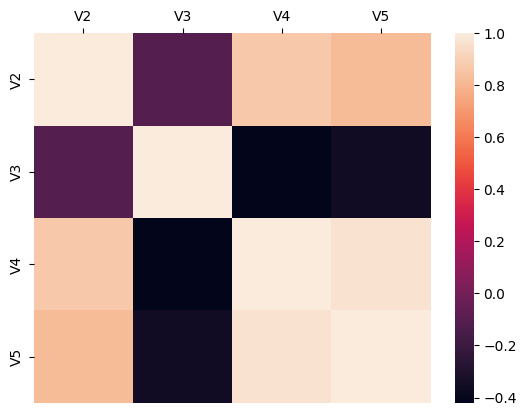

In [15]:
# Plot the correlation matrix as a heatmap
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()
plt.show()

An alternative nice visualization is via a Hinton diagram. The color of the boxes determines the sign of the correlation, in this case red for positive (+) and blue for negative (-) correlations; while the size of the boxes determines their magnitude, the bigger the box the higher the magnitude.

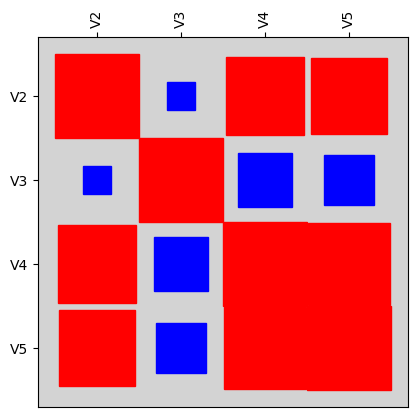

In [16]:
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)
    ax.autoscale_view()
    ax.invert_yaxis()

# Display the Hinton diagram for the correlation matrix
hinton(corrmat)
plt.show()

Although the correlation matrix and diagrams are useful for quickly looking to identify the strongest correlations, they still require labor work to find the top `N` strongest correlations. For this we can use the function `mosthighlycorrelated()` below.

The function `mosthighlycorrelated()` will print out the linear correlation coefficients for each pair of variables in the data set, in order of the correlation coefficient. This lets you see very easily which pair of variables are most highly correlated.

In [17]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # Compute the correlation matrix
    cormatrix = mydataframe.corr()
    # Zero out the diagonal and lower triangle so these do not get reported
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # Stack and sort by absolute value of the correlation coefficient
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # Rename the columns for clarity
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

# For example, print the top 3 correlated pairs among the iris measurements:
print(mosthighlycorrelated(X, 6))

  FirstVariable SecondVariable  Correlation
0            V4             V5     0.962757
1            V2             V4     0.871754
2            V2             V5     0.817954
3            V3             V4    -0.420516
4            V3             V5    -0.356544
5            V2             V3    -0.109369


  **Observations :**

    - The results indicate that petal length and petal width (V4 and V5) are very strongly associated, showing an almost perfect positive linear relationship.
    - Sepal length (V2) is also strongly linked to both petal dimensions, meaning that as sepal length increases, so do petal length and width.
    - In contrast, sepal width (V3) has a moderate inverse relationship with the petal measurements, while its association with sepal length is minimal.

### Standardising Variables

If we want to compare different variables that have different units, are very different variances, it is a good idea/practise to first standardise the variables.

Thus, it would be a better idea to first standardise the variables so that they all have variance 1 and mean 0, and to then carry out the principal component analysis (PCA) on the standardised data. This would allow us to find the principal components that provide the best low-dimensional representation of the variation in the original data, without being overly biased by those variables that show the most variance in the original data.

In [18]:
# Standardize the variables in X
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

print("Means of standardized variables:")
print(standardisedX.apply(np.mean))

print("\nStandard deviations of standardized variables:")
print(standardisedX.apply(np.std))

Means of standardized variables:
V2   -4.736952e-16
V3   -6.631732e-16
V4    3.315866e-16
V5   -2.842171e-16
dtype: float64

Standard deviations of standardized variables:
V2    1.0
V3    1.0
V4    1.0
V5    1.0
dtype: float64


## Principal Component Analysis

We call the PCA function and fit it on the standardised data.

In [19]:
# Perform PCA on Standardised Data
pca = PCA().fit(standardisedX)

### A Function to Summarise PCA Results

In [20]:
# Define a Function to Summarise PCA Results
def pca_summary(pca, standardised_data, out=True):
    """
    Produces a summary DataFrame similar to R's summary for PCA.

    """
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    sdev = np.std(pca.transform(standardised_data), axis=0)
    varprop = pca.explained_variance_ratio_
    cumprop = [np.sum(varprop[:i]) for i in range(1, len(varprop)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"),
                                          ("varprop", "Proportion of Variance"),
                                          ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(sdev, varprop, cumprop)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

# Get the PCA summary for the Iris dataset
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.706112,0.727705,0.727705
PC2,0.959803,0.230305,0.958010
PC3,0.383866,0.036838,0.994848
PC4,0.143554,0.005152,1.000000


**Observations on the Variance Explained by Principal Components:**

    -   PC1 has a standard deviation of approximately 1.706, which corresponds to a variance of 1.7062≈2.911.706^2 ≈ 2.911.7062 ≈ 2.91. This accounts for about 72.77% of the total variance (since there are 4 standardized variables, the total variance is 4).
    -   PC2 has a standard deviation of about 0.96, corresponding to a variance of 0.962 ≈ 0.920.96^2 ≈ 0.920.962 ≈ 0.92, or 23.03% of the total.
    -   PC3 and PC4 together explain only about 4% of the variance (3.68% + 0.52%), meaning they add relatively little information beyond the first two components.
    -   Taken together, PC1 and PC2 capture approximately 95.80% of the variance, making them an excellent 2D summary of the dataset.

### print the loadings

In [21]:
# print the loadings for the first and second principal components:
print("Loadings for PC1:\n", pca.components_[0])
print("\nLoadings for PC2:\n", pca.components_[1])

Loadings for PC1:
 [ 0.52237162 -0.26335492  0.58125401  0.56561105]

Loadings for PC2:
 [0.37231836 0.92555649 0.02109478 0.06541577]


### Create a scatterplot

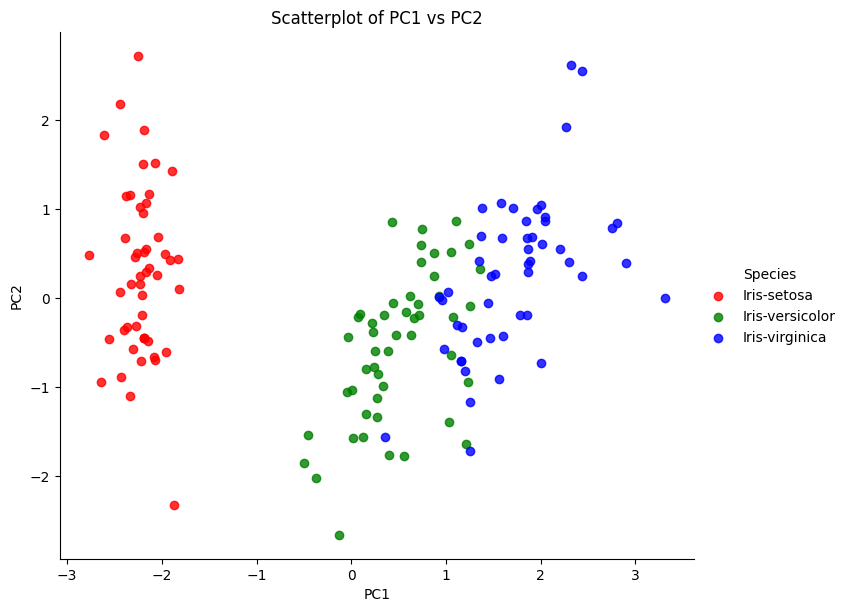

In [22]:
def pca_scatter(pca, standardised_values, classifs):
    """
    Create a scatterplot of the first two principal components with points labeled by species.
    """
    # Transform the data to obtain principal component scores.
    transformed = pca.transform(standardised_values)

    # Map numeric species codes to full species names.
    species_map = {"1": "Iris-setosa", "2": "Iris-versicolor", "3": "Iris-virginica"}
    species_names = classifs.map(species_map)

    # Create a DataFrame for plotting.
    pc_df = pd.DataFrame({
        "PC1": transformed[:, 0],
        "PC2": transformed[:, 1],
        "Species": species_names
    })

    # Define a palette with distinct colors for each species.
    palette = {"Iris-setosa": "red", "Iris-versicolor": "green", "Iris-virginica": "blue"}

    # Create the scatterplot with a legend indicating the species.
    sns.lmplot(x="PC1", y="PC2", data=pc_df, hue="Species", fit_reg=False, height=6, aspect=1.2, palette=palette)
    plt.title("Scatterplot of PC1 vs PC2")
    plt.show()

# Plot the first two principal components for the iris dataset with clear color indicators.
pca_scatter(pca, standardisedX, y)

**Observations based on Scatterplot of PC1 vs PC2:**

    -   The 2D scatterplot (PC1 on the x-axis, PC2 on the y-axis) shows the three Iris species forming distinct clusters:
        -   Iris-setosa** (red) is far to the left (low PC1 scores, reflecting smaller petals).
        -   Iris-versicolor (green) occupies the central region, generally with moderate PC1 and higher PC2 scores.
        -   Iris-virginica (blue) sits toward the right (high PC1, reflecting larger petals).
    -   Because these first two components capture about 96% of the total variance, the species are well-separated in just two dimensions.

## Linear Discriminant Analysis

The purpose of principal component analysis (PCA) is to find the best low-dimensional representation of the variation in a multivariate data set.

The purpose of linear discriminant analysis (LDA) is to find the linear combinations of the original variables that gives the best possible separation between the groups in our data set.

This is what we do next:

In [42]:
lda = LinearDiscriminantAnalysis().fit(X, y)

### Loadings for the Discriminant Functions


In [24]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

pretty_scalings_ = pretty_scalings(lda, X, out=True)

Coefficients of linear discriminants:


,LD1,LD2
V2,0.819269,-0.032860
V3,1.547873,-2.154711
V4,-2.184941,0.930247
V5,-2.853850,-2.806005


**Observations:**

    The first discriminant function for the Iris dataset is a linear combination of the four measurement variables. In our case, it is given by:

$$LD1=0.819269×V2+1.547873×V3-2.184941×V4-2.853850×V5$$

where:

    -   V2 represents Sepal Length,
    -   V3 represents Sepal Width,
    -   V4 represents Petal Length, and
    -   V5 represents Petal Width.

For convenience, the values for each discriminant function are scaled so that their mean is zero. These loadings are determined such that the within-group variance of each discriminant function (for each Iris species) is equal to 1.

In this array, the first column contains the loadings for the first discriminant function (LD1), the second column for the second discriminant function (LD2), and so on.

In [25]:
lda.scalings_[:, 0]

array([ 0.81926852,  1.5478732 , -2.18494056, -2.85385002])

Or for "prettier" print, we can use the dataframe variable created above:

In [26]:
pretty_scalings_.LD1

,LD1
V2,0.819269
V3,1.547873
V4,-2.184941
V5,-2.853850


We calculate the values of the first discriminant function; we define our own function `calclda()`:

In [27]:
def calclda(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the discriminant function
    ld = np.zeros(numsamples)
    # calculate the value of the discriminant function for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        ld[i] = valuei
    # standardise the discriminant function so that its mean value is 0:
    ld = scale(ld, with_std=False)
    return ld

The function `calclda()` computes the value of a discriminant function for each sample in the dataset. For instance, for the first discriminant function (LD1), the value for each sample is obtained by forming the linear combination:

$$LD1=0.819269×V2+1.547873×V3-2.184941×V4-2.853850×V5$$

where:

    -   V2 represents Sepal Length,
    -   V3 represents Sepal Width,
    -   V4 represents Petal Length, and
    -   V5 represents Petal Width.


Within the `calclda()` function, the `scale()` command is then applied to standardize these discriminant values so that their overall mean is zero.

This function can be used to calculate the values of the first discriminant function for each sample in the Iris dataset.

In [28]:
calclda(X, lda.scalings_[:, 0])

array([ 8.0849532 ,  7.1471629 ,  7.51137789,  6.83767561,  8.15781367,
        7.72363087,  7.23514662,  7.62974497,  6.58274132,  7.36884116,
        8.42181434,  7.24739721,  7.35062105,  7.59646896,  9.86936588,
        9.18033614,  8.59760709,  7.7995682 ,  8.1000091 ,  8.04543611,
        7.52046427,  7.60526378,  8.70408249,  6.26374139,  6.59191505,
        6.79210164,  6.84048091,  7.948386  ,  8.01209273,  6.85589572,
        6.78303525,  7.38668238,  9.16249492,  9.49617185,  7.36884116,
        7.9756525 ,  8.63115466,  7.36884116,  6.95602269,  7.71167183,
        7.9361354 ,  5.6690533 ,  7.26559733,  6.42449823,  6.88607488,
        6.77985104,  8.11232705,  7.21095698,  8.33988749,  7.69345171,
       -1.45772244, -1.79768044, -2.41680973, -2.26486771, -2.55339693,
       -2.41954768, -2.44719309, -0.2160281 , -1.74591275, -1.95838993,
       -1.19023864, -1.86140718, -1.15386577, -2.65942607, -0.38024071,
       -1.20280815, -2.7626699 , -0.76227692, -3.50940735, -1.08

It doesn’t matter whether the input variables for linear discriminant analysis are standardised or not, unlike for principal components analysis in which it is often necessary to standardise the input variables. However, using standardised variables in linear discriminant analysis makes it easier to interpret the loadings in a linear discriminant function.

In linear discriminant analysis, the standardised version of an input variable is defined so that it has mean zero and within-groups variance of 1. Thus, we can calculate the “group-standardised” variable by subtracting the mean from each value of the variable, and dividing by the within-groups standard deviation. To calculate the group-standardised version of a set of variables, we can use the function `groupStandardise()` below:

In [29]:
def groupStandardise(variables, groupvariable):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # find the variable names
    variablenames = variables.columns
    # calculate the group-standardised version of each variable
    variables_new = pd.DataFrame()
    for i in range(numvariables):
        variable_name = variablenames[i]
        variablei = variables[variable_name]
        variablei_Vw = calcWithinGroupsVariance(variablei, groupvariable)
        variablei_mean = np.mean(variablei)
        variablei_new = (variablei - variablei_mean)/(np.sqrt(variablei_Vw))
        variables_new[variable_name] = variablei_new
    return variables_new

For example, we can use the `groupStandardise()` function to calculate the group-standardised versions:

In [30]:
groupstandardisedX = groupStandardise(X, y)

We can then use the `LinearDiscriminantAnalysis().fit()` method to perform linear disriminant analysis on the group-standardised variables:

In [31]:
lda2 = LinearDiscriminantAnalysis().fit(groupstandardisedX, y)
pretty_scalings(lda2, groupstandardisedX)

,LD1,LD2
V2,0.421751,-0.016916
V3,0.526924,-0.733502
V4,-0.940210,0.400298
V5,-0.584941,-0.575134


It makes sense to interpret the loadings computed using group‐standardized variables because they allow us to see more clearly which measurements drive the separation between species. For the Iris dataset, the first discriminant function (LD1) for the group‐standardized variables is given by:

$$LD1=0.421751×V2+0.526924×V3-0.940210×V4-0.584941×V5$$

**Observations:**

    - Here, V2 (Sepal Length) and V3 (Sepal Width) have positive loadings, while V4 (Petal Length) and V5 (Petal Width) have negative loadings.

    - This indicates that LD1 represents a contrast between the petal measurements and the sepal measurements. In other words, samples with larger petals (which yield more negative contributions) will tend to have lower LD1 scores compared to samples with relatively larger sepals.

Previous analyses have shown that petal measurements tend to provide the strongest separation between the Iris species. Therefore, it is not surprising that Petal Length (V4) and Petal Width (V5) exhibit the highest (in absolute value) loadings in LD1.

Note that although the loadings for the group‐standardized variables are easier to interpret, the values of the discriminant function are the same whether you standardize the input variables or not. In practice, we can compute the first discriminant function using either the original or the group‐standardized variables, and the resulting scores will be identical:

In [32]:
lda.fit_transform(X, y)[:, 0]

array([ 8.0849532 ,  7.1471629 ,  7.51137789,  6.83767561,  8.15781367,
        7.72363087,  7.23514662,  7.62974497,  6.58274132,  7.36884116,
        8.42181434,  7.24739721,  7.35062105,  7.59646896,  9.86936588,
        9.18033614,  8.59760709,  7.7995682 ,  8.1000091 ,  8.04543611,
        7.52046427,  7.60526378,  8.70408249,  6.26374139,  6.59191505,
        6.79210164,  6.84048091,  7.948386  ,  8.01209273,  6.85589572,
        6.78303525,  7.38668238,  9.16249492,  9.49617185,  7.36884116,
        7.9756525 ,  8.63115466,  7.36884116,  6.95602269,  7.71167183,
        7.9361354 ,  5.6690533 ,  7.26559733,  6.42449823,  6.88607488,
        6.77985104,  8.11232705,  7.21095698,  8.33988749,  7.69345171,
       -1.45772244, -1.79768044, -2.41680973, -2.26486771, -2.55339693,
       -2.41954768, -2.44719309, -0.2160281 , -1.74591275, -1.95838993,
       -1.19023864, -1.86140718, -1.15386577, -2.65942607, -0.38024071,
       -1.20280815, -2.7626699 , -0.76227692, -3.50940735, -1.08

In [33]:
lda2.fit_transform(groupstandardisedX, y)[:, 0]

array([ 8.0849532 ,  7.1471629 ,  7.51137789,  6.83767561,  8.15781367,
        7.72363087,  7.23514662,  7.62974497,  6.58274132,  7.36884116,
        8.42181434,  7.24739721,  7.35062105,  7.59646896,  9.86936588,
        9.18033614,  8.59760709,  7.7995682 ,  8.1000091 ,  8.04543611,
        7.52046427,  7.60526378,  8.70408249,  6.26374139,  6.59191505,
        6.79210164,  6.84048091,  7.948386  ,  8.01209273,  6.85589572,
        6.78303525,  7.38668238,  9.16249492,  9.49617185,  7.36884116,
        7.9756525 ,  8.63115466,  7.36884116,  6.95602269,  7.71167183,
        7.9361354 ,  5.6690533 ,  7.26559733,  6.42449823,  6.88607488,
        6.77985104,  8.11232705,  7.21095698,  8.33988749,  7.69345171,
       -1.45772244, -1.79768044, -2.41680973, -2.26486771, -2.55339693,
       -2.41954768, -2.44719309, -0.2160281 , -1.74591275, -1.95838993,
       -1.19023864, -1.86140718, -1.15386577, -2.65942607, -0.38024071,
       -1.20280815, -2.7626699 , -0.76227692, -3.50940735, -1.08

We can see that although the loadings are different for the first discriminant functions calculated using unstandardised and group-standardised data, the actual values of the first discriminant function are the same.

### Separation Achieved by the Discriminant Functions

To assess how well each discriminant function separates the Iris species, we first compute its values for each sample by substituting the corresponding measurements into the linear combination that defines the function. For example, if the first discriminant function (LD1) for the Iris dataset is defined as

$$LD1=0.421751×V2+0.526924×V3-0.940210×V4-0.584941×V5$$

then for each iris sample we compute LD1 by multiplying its Sepal Length (V2), Sepal Width (V3), Petal Length (V4), and Petal Width (V5) by the respective coefficients, and summing the results. We then standardize these LD1 values---typically by centering them so that their overall mean is zero---to facilitate comparison between groups.

The computed values can then be used to evaluate the separation achieved by the discriminant functions, for instance by comparing the between-groups variance to the within-groups variance for each function.

In [34]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values = rpredict(lda, standardisedX, y, True)

class
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2']

posterior
                1             2             3
0    1.000000e+00  9.391184e-26  1.429639e-52
1    1.000000e+00  1.374125e-16  2.645653e-41
2    1.000000e+00  1.216332e-19  6.546325e-45
3    1.000000e+00  1.677002e-16  7.073496e-41
4    1.000000e+00  5.147104e-27  5.132946e-54
..            ...           ...           ...
145  7.657196e-27  9.989573e-01  1.042650e-03
146  

The returned variable has a named element `x` which is a matrix containing the linear discriminant functions: the first column of `x` contains the first discriminant function, the second column of `x` contains the second discriminant function, and so on (if there are more discriminant functions).

We can therefore calculate the separations achieved by the two linear discriminant functions for the wine data by using the `calcSeparations()` function (see above), which calculates the separation as the ratio of the between-groups variance to the within-groups variance:

In [35]:
calcSeparations(lda_values["x"], y)

,Variable,Vw,Vb,Separation
0,LD1,1.0,2371.9889,2371.9889
1,LD2,1.0,20.4012,20.4012


The loadings for each discriminant function are computed so that the within-group variance (Vw) for each function is 1. In our output from calcSeparations(), we see that LD1 has a Vw of 1 and a between-groups variance (Vb) of approximately 2371.99, giving a separation value of 2371.99; LD2 similarly has a Vw of 1 and a Vb of about 20.40, yielding a separation of 20.40. Adding these together, the total separation achieved by both discriminant functions is roughly 2392.39.This means that LD1 accounts for about 99.15% of the total separation ($\frac{2371.99}{2392.39}×100$ \%) and LD2 contributes only about 0.85% ($\frac{20.40}{2392.39}×100$ \%) as shown below:

**Observations:**

    - This means that LD1 accounts for about 99.15% of the total separation and LD2 contributes only about 0.85% as shown below:

In [36]:
def proportion_of_trace(lda):
    ret = pd.DataFrame([round(i, 4) for i in lda.explained_variance_ratio_ if round(i, 4) > 0], columns=["ExplainedVariance"])
    ret.index = ["LD"+str(i+1) for i in range(ret.shape[0])]
    ret = ret.transpose()
    print("Proportion of trace:")
    print(ret.to_string(index=False))
    return ret

proportion_of_trace(LinearDiscriminantAnalysis(solver="eigen").fit(X, y));

Proportion of trace:
   LD1    LD2
0.9915 0.0085


    Therefore, the first discriminant function itself provides a very strong separation among the three groups.

### A Stacked Histogram of the LDA Values

A nice way of displaying the results of a linear discriminant analysis (LDA) is to make a stacked histogram of the values of the discriminant function for the samples from different groups.

In [37]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel("group"+str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

For example, to make a stacked histogram of the first discriminant function’s values for wine samples of the three different wine cultivars, we type:

<ipython-input-37-028b53f6d8d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
<ipython-input-37-028b53f6d8d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
<ipython-input-37-028b53

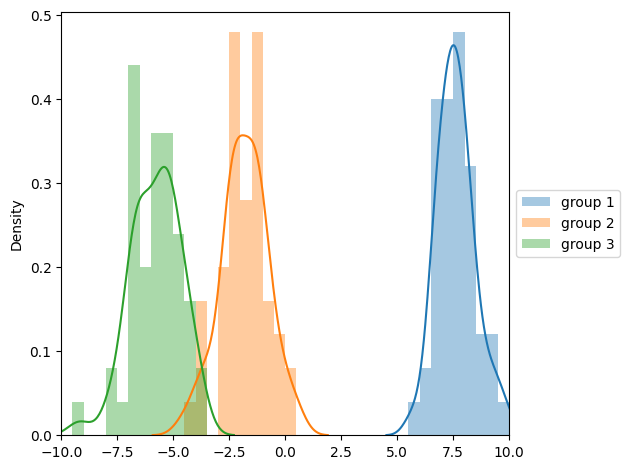

In [38]:
ldahist(lda_values["x"].LD1, y)

**Observations:**

    - From the histogram, we see that group 1 and group 3 have non-overlapping ranges on the first discriminant function (LD1). Group 1's LD1 values lie around -9 to -4, while group 3's LD1 values lie around 6 to 10. However, the separation between group 1 and group 2,3 is more pronounced compared to group 2 and group 3.

    - It's important to note that these results come from the training data, so the separation might be overestimated. To gain a more realistic assessment of how well LD1 distinguishes the groups, one might ideally look at a histogram of LD1 values on an unseen test set (which is not done here)

    - Because the first discriminant function alone does not cleanly separate groups 1 and 2 or groups 2 and 3, we next investigate whether the second discriminant function (LD2) can further improve group separation by examining its values in a similar histogram.

<ipython-input-37-028b53f6d8d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
<ipython-input-37-028b53f6d8d7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
<ipython-input-37-028b53

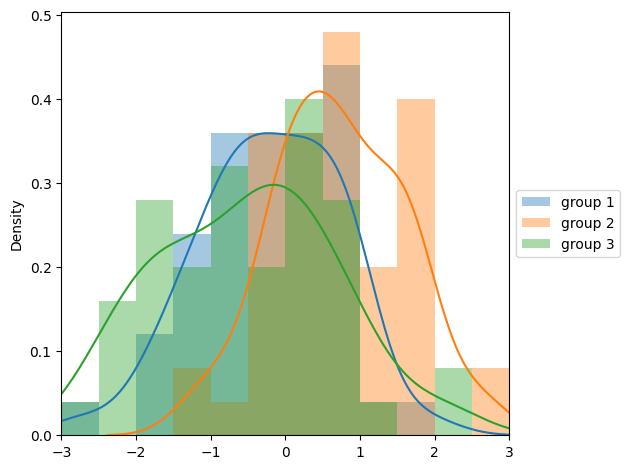

In [39]:
ldahist(lda_values["x"].LD2, y)

In other words, while LD1 alone already distinguishes the groups fairly well. We also see that the second discriminant function suffers from a lot of overlap in their values.

However, while LD1 captures most of the between-group variance, using a second discriminant function (LD2) can further refine the separation between Iris‑versicolor and Iris‑virginica. So we keep both LD1 \& LD2.

### Scatterplots of the Discriminant Functions

We can obtain a scatterplot of the best two discriminant functions, with the data points labelled by iris type:

<ipython-input-43-9dab5793adef>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, subset in df_ld.groupby("V1"):


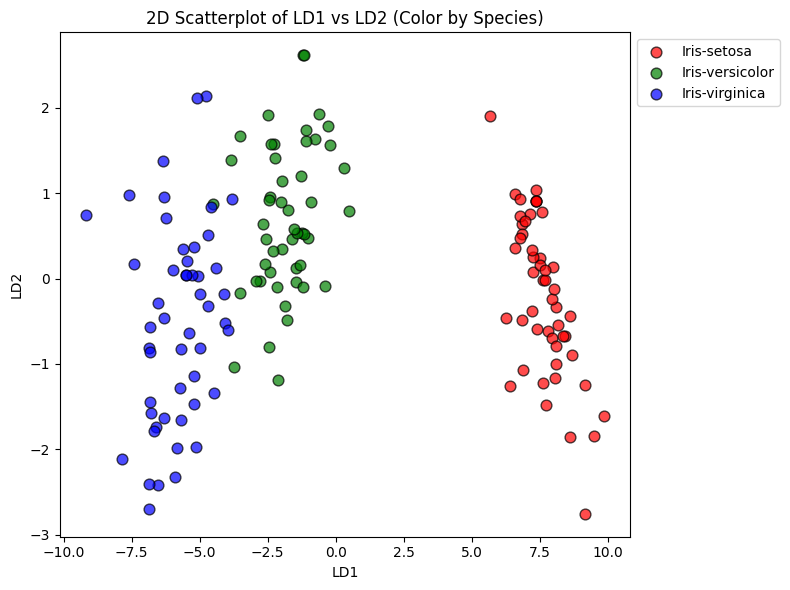

In [43]:
df_ld = lda_values["x"][["LD1", "LD2"]].join(y)
df_ld["V1"] = df_ld["V1"].astype("category")

species_map = {"1": "Iris-setosa", "2": "Iris-versicolor", "3": "Iris-virginica"}
df_ld["Species"] = df_ld["V1"].map(species_map)

colors = {"1": "red", "2": "green", "3": "blue"}

plt.figure(figsize=(8, 6))
for label, subset in df_ld.groupby("V1"):
    plt.scatter(subset["LD1"], subset["LD2"], c=colors[label],
                label=species_map[label], alpha=0.7, edgecolor='k', s=60)

plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("2D Scatterplot of LD1 vs LD2 (Color by Species)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The above figure shows a one-dimensional plot of the first discriminant function (LD1), with each species indicated by a different color.

    - We can see that this single axis already separates Iris-setosa quite distinctly from the others, although there is some overlap for Iris-versicolor & Iris-virginica.

Finally lets have a look at scatterplot for LD1 only:

<ipython-input-45-ccac807cb649>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, subset in df_ld1.groupby("V1"):


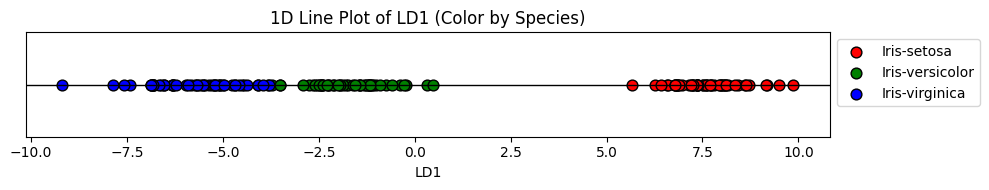

In [45]:
df_ld1 = lda_values["x"][["LD1"]].join(y)
df_ld1["V1"] = df_ld1["V1"].astype("category")

species_map = {"1": "Iris-setosa", "2": "Iris-versicolor", "3": "Iris-virginica"}
df_ld1["Species"] = df_ld1["V1"].map(species_map)

colors = {"1": "red", "2": "green", "3": "blue"}

plt.figure(figsize=(10, 2))
for label, subset in df_ld1.groupby("V1"):
    plt.scatter(subset["LD1"], np.zeros(len(subset)),
                c=colors[label], label=species_map[label],
                s=60, marker='o', edgecolor='k')

plt.axhline(0, color="black", linewidth=1)

plt.xlabel("LD1")
plt.title("1D Line Plot of LD1 (Color by Species)")
plt.yticks([])  # Hide y-axis labels as they are not needed in 1D
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Final Analysis and Overview

EDA, PCA, and LDA complement each other by providing a progressively deeper understanding of the Iris dataset, each from a unique perspective.

Our initial EDA consists of various visualizations such as matrix scatterplots, pairwise scatterplots, and profile plots. These plots reveal the basic structure and relationships among the four measurements (sepal length, sepal width, petal length, and petal width). For instance, the scatterplots clearly show that petal length (V4) and petal width (V5) are strongly correlated and exhibit distinct clusters corresponding to the three iris species. Meanwhile, sepal measurements (V2 and V3) show more overlap between species, suggesting that they are less powerful discriminators on their own. The profile plots further reinforce these observations by showing step-like changes that align with species boundaries. In short, EDA sets the stage by identifying which variables are most informative and hints at how the groups might be separated.


Building on the insights from EDA, PCA transforms the original variables into new, uncorrelated components that capture the maximum variance in the data. When we standardize the data (to give each variable equal weight) and run PCA, we find that the first principal component (PC1) accounts for approximately 72.8% of the total variance, while the second principal component (PC2) explains about 23.0% of the variance. This means that nearly 96% of the variability in the data can be summarized in just two dimensions. The loadings for PC1 show high contributions from petal measurements, which confirms our EDA observation that petal length and petal width are key for differentiating species. The 2D scatterplot of PC1 versus PC2 reveals distinct clusters for Iris-setosa, Iris-versicolor, and Iris-virginica, thereby providing quantitative evidence that the chosen measurements effectively capture the underlying group structure.

While PCA focuses on capturing overall variance without considering group labels, LDA is explicitly designed to maximize separation between predefined groups (the three iris species). LDA finds linear combinations of the original variables that best separate the species. In our analysis, the first discriminant function (LD1) is primarily driven by a contrast between petal measurements (which have strong negative loadings) and sepal measurements (with positive loadings). This result is consistent with both EDA and PCA findings, as we observed that petal dimensions are the most distinguishing features. Although LD1 alone already provides strong separation—particularly isolating Iris-setosa—the second discriminant function (LD2) offers additional nuance by further separating the species that overlap on LD1. However, in our case, LD1 accounts for the vast majority of the separation (over 99% of the between-group variance), indicating that a one-dimensional plot of LD1 already captures the dominant separation. This is reflected in our one-dimensional LDA plot where Iris-setosa, Iris-versicolor, and Iris-virginica are clearly differentiated, even though some overlap remains between Iris-versicolor and Iris-virginica.

EDA identifies that petal measurements are the most variable and discriminative features among the species.
PCA quantitatively confirms that most of the variance (and hence the intrinsic structure) in the data is driven by these features, and shows that a two-dimensional representation is nearly sufficient to capture the overall variability.
LDA then leverages these insights to construct discriminant functions that are optimized for class separation, confirming that the petal measurements indeed dominate the discrimination, while also showing that even a single discriminant function (LD1) can provide substantial separation.

To summarise, EDA provides a visual and intuitive understanding of the data, PCA offers a formal reduction in dimensionality that highlights the dominant patterns, and LDA directly targets the differences between species. Together, they form a cohesive analytical framework that not only explains the structure of the Iris dataset but also supports robust classification of the iris species.